# FOOD AND NUTRITION PROJECT 
### Goals: Which Cuisine/Course/Diet has more cooking Time?
### Which has lowest cooking/prep time?
### Filter Datas based on User needs

### importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#### Loading the data

In [5]:
df = pd. read_csv("Recipe.csv")
data = df.copy()
data.shape


(6871, 15)

### We have 6871 rows and 15 columns

### Dropping Unwanted Columns and Renaming the Columns
###### we have columns in hindi lets remove it and keep all the values in English

In [6]:
data.drop(["Ingredients"], axis = 1, inplace = True) 
data.shape #After dropping there are 6871,14 datas.
#dropping unwanted columns to avoid redundancy
data.drop(["RecipeName"],axis = 1 , inplace= True)
data.drop(["Instructions"], axis =1 , inplace = True)
data.shape

(6871, 12)

#### After removing the columns we have 6871 rows and 12 columns lets rename the columns now

In [9]:
data.rename(columns={'TranslatedRecipeName':'Recipe Name','TranslatedIngredients':'Ingredients', 'TranslatedInstructions':'Instructions','Srno':'Recipe No', 'PrepTimeInMins':'Preparation Time/Min','CookTimeInMins':'Cooking Time/Min','TotalTimeInMins':'Total Time/Min','URL':'Link'},inplace=True)
data.columns

Index(['Recipe No', 'Recipe Name', 'Ingredients', 'Preparation Time/Min',
       'Cooking Time/Min', 'Total Time/Min', 'Servings', 'Cuisine', 'Course',
       'Diet', 'Instructions', 'Link'],
      dtype='object')

### Describe Method on numbers and Objects

In [14]:
data.describe(include=[np.number])

,Recipe No,Preparation Time/Min,Cooking Time/Min,Total Time/Min,Servings
count,6871.000000,6871.000000,6871.000000,6871.000000,6871.000000
mean,4902.979042,28.585213,30.832339,59.417552,5.611410
std,3479.531022,81.042007,34.019694,88.699940,26.221807
min,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1955.500000,10.000000,20.000000,30.000000,4.000000
50%,4304.000000,15.000000,30.000000,40.000000,4.000000
75%,7363.000000,20.000000,35.000000,55.000000,4.000000
max,14211.000000,2880.000000,900.000000,2925.000000,1000.000000


###### mean	4902.979042	28.585213	30.832339	59.417552	5.611410
###### max	14211.000000	2880.000000	900.000000	2925.000000	1000.000000

In [15]:
data.describe(include=[np.object])

,Recipe Name,Ingredients,Cuisine,Course,Diet,Instructions,Link
count,6871,6865,6871,6871,6871,6871,6871
unique,6843,6857,82,20,10,6870,6871
top,Carrot and Beans Poriyal (Recipe In Hindi),"500 grams Button mushrooms - chopped,2 Green C...",Indian,Lunch,Vegetarian,To prepare Four Cheese and Spinach Stuffed Mus...,http://www.archanaskitchen.com/mangalorean-kun...
freq,2,2,1157,1765,4712,2,1


### Top Recipe Name :Carrot and Beans Poriyal
### Top Cuisine : Indian
### Top Course : Lunch
### Top Diet : Vegetarian
### (Mean) Servings :5
### (Mean) Preparation Time: 28 
### (Mean) Cooking Time : 30 
### (Mean) Total Time : 59 


#### Setting Index to Recipe No

In [17]:
data.set_index("Recipe No", inplace= True)

In [19]:
data.head(2)
data.shape

(6871, 11)

### Checking for null value

In [20]:
print(data.isnull().sum())

Recipe Name             0
Ingredients             6
Preparation Time/Min    0
Cooking Time/Min        0
Total Time/Min          0
Servings                0
Cuisine                 0
Course                  0
Diet                    0
Instructions            0
Link                    0
dtype: int64


##### I see Ingredients Column has 6 missing value. Is the missing values are MCAR, MAR or MNAR?Dropping is most useful when the percentage of missing data is low.

In [30]:
data.dropna(subset=["Ingredients"], axis=0, inplace=True)
print("Checking after deleting the rows which has null columns:" , data.isnull().sum())
print("After cleaning the number of rows and columns: ",data.shape)

Checking after deleting the rows which has null columns: Recipe Name             0
Ingredients             0
Preparation Time/Min    0
Cooking Time/Min        0
Total Time/Min          0
Servings                0
Cuisine                 0
Course                  0
Diet                    0
Instructions            0
Link                    0
dtype: int64
After cleaning the number of rows and columns:  (6865, 11)


# Let's Visualise the Top Course Top Cuisine Top Diet through Visualisation

# CountPlot to Top Course in Data
### Show value counts for a single categorical variable:

#### The Categorical Variables can be : Course, Diet and Cuisine.
#### The Numerical Variable can be: Prep Time, CookingTime, Total Time and Servings

Text(0.5, 1.0, 'Types of Diet')

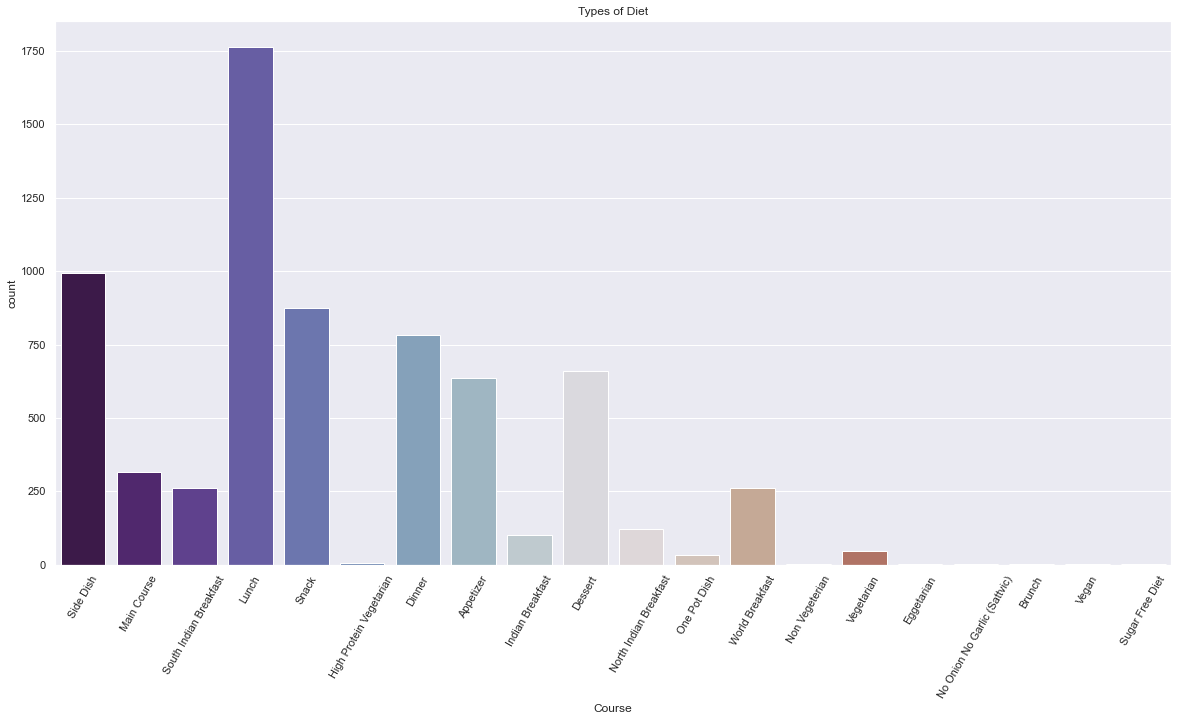

In [51]:
sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(x='Course',data=data,palette='twilight_shifted')
plt.xticks(rotation=60)
plt.title('Types of Diet')

##### The order has follows (from high to low) Lunch, Side Dish , Snack, Dinner,Dessert,Appetizer, Maincourse ..the list goes off

# Plot Bar on Cuisine Column

Text(0, 0.5, 'Cooking Time/Min')

C:\Users\kgvij\Lavanya\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 65279 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\kgvij\Lavanya\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 65279 missing from current font.
  font.set_text(s, 0, flags=flags)


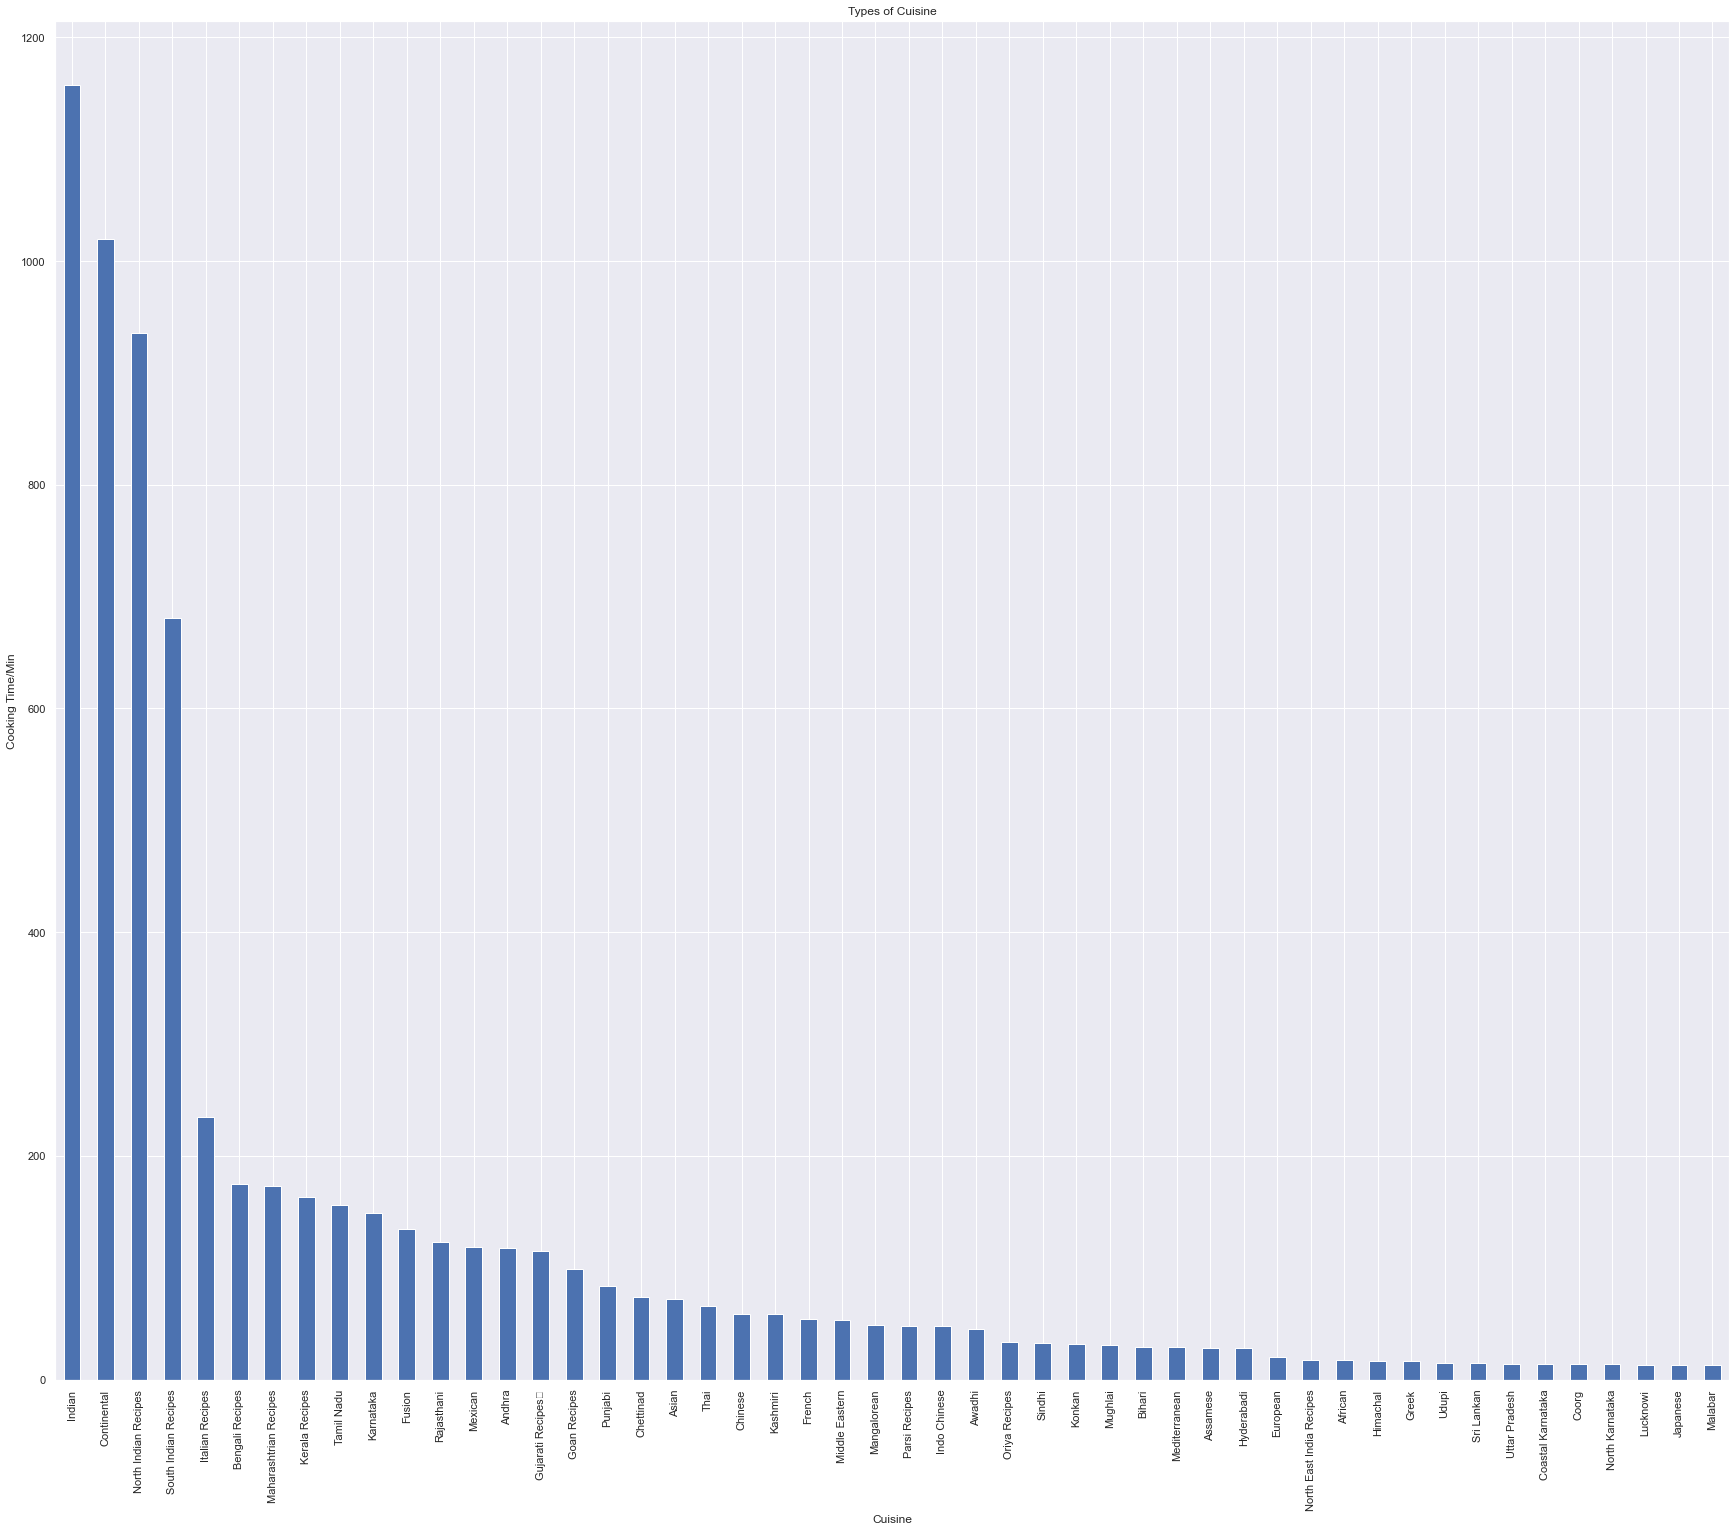

In [49]:
data.Cuisine.value_counts().nlargest(50).plot(kind="bar",figsize=(30,25))
plt.title("Types of Cuisine")
plt.xlabel("Cuisine")
plt.ylabel("Cooking Time/Min")

##### Indian ,Continental ,North Indian ,South Indian, Italian ,Bengali ...The list goes on

# CountPlot on Diet

Text(0.5, 1.0, 'Types of Diets')

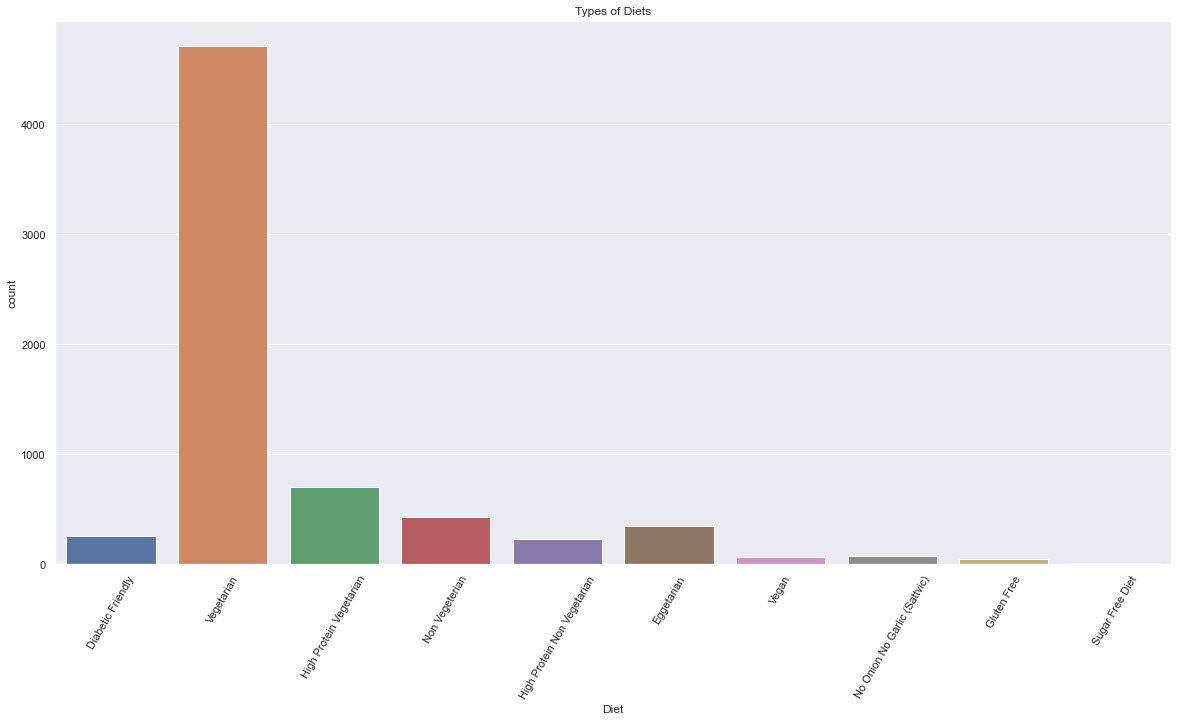

In [50]:
sns.set_theme(style="darkgrid")
sns.countplot(x='Diet',data=data)
plt.xticks(rotation=60)
plt.title("Types of Diets")

### Vegetarian ,High Proteing Veg, Non Veg ,Eggetarian ....(ranking from high to low)

# Time needed for cooking :VIOLIN PLOT

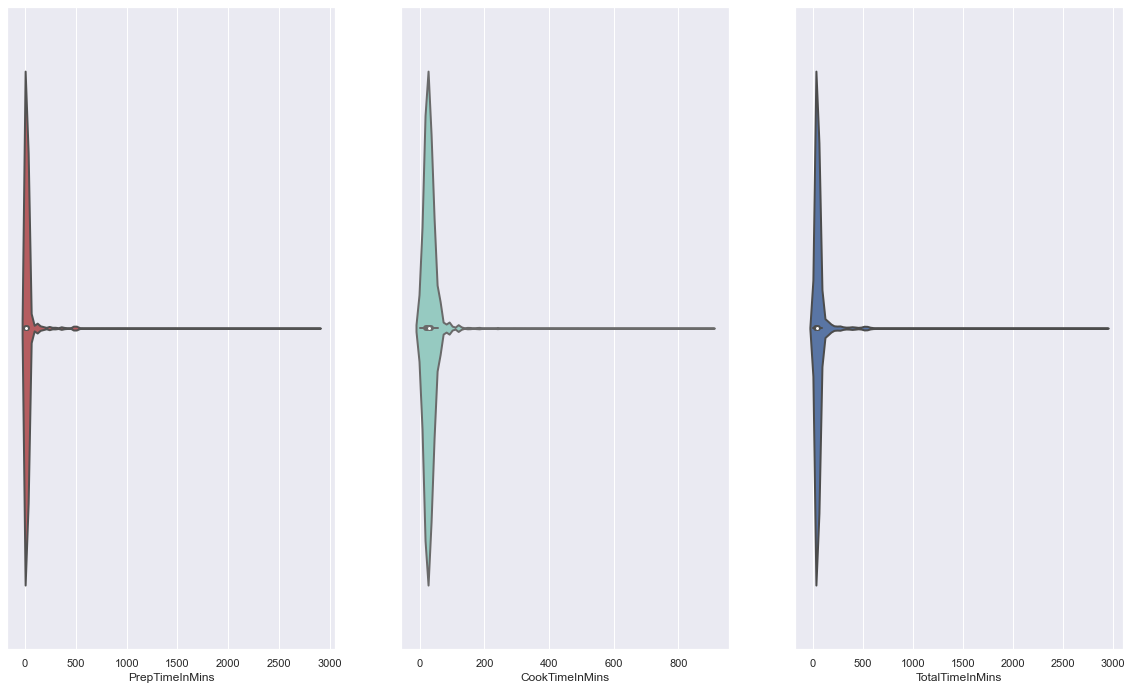

In [101]:
fig = plt.figure(figsize=(20,26))
prep_time = fig.add_subplot(231)
prep_time=sns.violinplot(x='PrepTimeInMins',data=df,color='r',  linewidth=2) 
cook_time = fig.add_subplot(232)
cook_time=sns.violinplot(x='CookTimeInMins',data=df,palette="Set3", linewidth=2)
total_time = fig.add_subplot(233)
total_time=sns.violinplot(x='TotalTimeInMins',data=df, linewidth=2)

###### the white dot represents the median the thick black bar in the center represents the interquartile range the thin gray line represents the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the interquartile range.On each side of the gray line is a kernel density estimation to show the distribution shape of the data. Wider sections of the violin plot represent a higher probability that members of the population will take on the given value; the skinnier sections represent a lower probability.

# Total Time required to make each type of Diet recipes

### CAT PLOT

Text(0.5, 1.0, 'Total time required for each Diet')

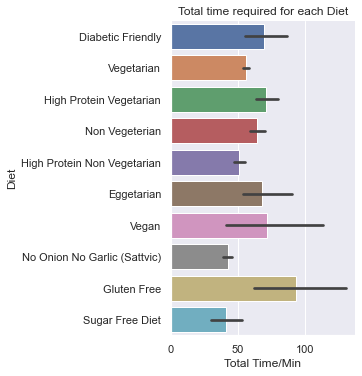

In [128]:
#Total Time
sns.set(rc={'figure.figsize':(50,10)})
sns.catplot(x=data['Total Time/Min'],y='Diet',kind='bar',data=data)
plt.title('Total time required for each Diet')

Text(0.5, 1.0, 'Total time required for each Course')

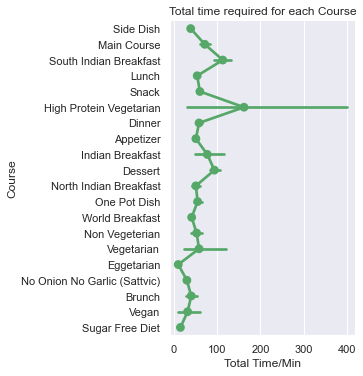

In [127]:
sns.set(rc={'figure.figsize':(50,30)})
sns.catplot(x='Total Time/Min',y='Course',kind='point',data=data,color='g')
plt.title('Total time required for each Course')

# Let's see the visualised graph in number format:

In [115]:
Top_diets = data.Diet.value_counts().head(10)
print("The top_diets are: " )
print(Top_diets)


The top_diets are: 
Vegetarian                      4706
High Protein Vegetarian          705
Non Vegeterian                   427
Eggetarian                       344
Diabetic Friendly                260
High Protein Non Vegetarian      225
No Onion No Garlic (Sattvic)      73
Vegan                             61
Gluten Free                       50
Sugar Free Diet                   14
Name: Diet, dtype: int64


In [123]:
Top_Cuisine = data.Cuisine.value_counts().head(60)
print("The Top Cuisine are: ")
print(Top_Cuisine)


The Top Cuisine are: 
Indian                      1157
Continental                 1020
North Indian Recipes         936
South Indian Recipes         681
Italian Recipes              235
Bengali Recipes              175
Maharashtrian Recipes        173
Kerala Recipes               163
Tamil Nadu                   156
Karnataka                    149
Fusion                       135
Rajasthani                   123
Mexican                      119
Andhra                       118
Gujarati Recipes﻿            115
Goan Recipes                  99
Punjabi                       84
Chettinad                     74
Asian                         72
Thai                          66
Chinese                       59
Kashmiri                      59
French                        54
Middle Eastern                53
Mangalorean                   49
Parsi Recipes                 48
Indo Chinese                  48
Awadhi                        45
Oriya Recipes                 34
Sindhi               

In [124]:
Top_Course = data.Course.value_counts().head(20)
print("The Top Course are: ")
print(Top_Course)


The Top Course are: 
Lunch                           1763
Side Dish                        992
Snack                            876
Dinner                           781
Dessert                          659
Appetizer                        637
Main Course                      315
South Indian Breakfast           260
World Breakfast                  260
North Indian Breakfast           122
Indian Breakfast                 101
Vegetarian                        47
One Pot Dish                      33
High Protein Vegetarian            7
Brunch                             4
Vegan                              3
Non Vegeterian                     2
Eggetarian                         1
Sugar Free Diet                    1
No Onion No Garlic (Sattvic)       1
Name: Course, dtype: int64


# Correlation Matrix : Timings

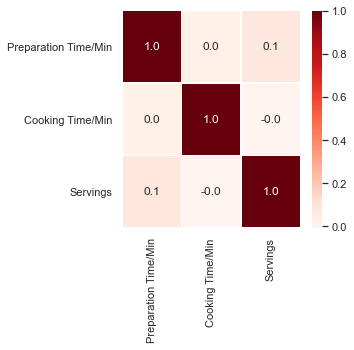

The correlation :                       Preparation Time/Min  Cooking Time/Min  Servings
Preparation Time/Min              1.000000          0.025864  0.071764
Cooking Time/Min                  0.025864          1.000000 -0.007955
Servings                          0.071764         -0.007955  1.000000


In [138]:
#creating a matrix for more than 2 variable ,all the variable here are numeric
plt.subplots(figsize=(4, 4))
corr_numeric=data[['Preparation Time/Min','Cooking Time/Min','Servings']].corr()

#plot the correlation matrix of Preparation Time/Min','Cooking Time/Min','Servings in data dataframe.
sns.heatmap(data[['Preparation Time/Min','Cooking Time/Min','Servings']].corr(), annot=True, cmap = 'Reds',linewidths=.5, fmt= '.1f')
plt.show()
print("The correlation :", corr_numeric)

# Converting Mins to Hours

##### Can we convert mins to hours ??? Instead of saying 120 mins ?!

In [142]:
total_Hrs=pd.to_datetime(data['Total Time/Min'], unit='m').dt.strftime('%H:%M')
total_Hrs[100:125]
data['Total Time)']=total_Hrs
data[10:20]
data.columns

Index(['Recipe Name', 'Ingredients', 'Preparation Time/Min',
       'Cooking Time/Min', 'Total Time/Min', 'Servings', 'Cuisine', 'Course',
       'Diet', 'Instructions', 'Link', 'Total Time)'],
      dtype='object')

## Grouping the Data

In [158]:
df_group_one = data[['Diet','Course','Cuisine','Total Time/Min']]
df_group_one[10:30]

,Diet,Course,Cuisine,Total Time/Min
Recipe No,,,,
11,Vegetarian,High Protein Vegetarian,Fusion,120
12,Vegetarian,Main Course,Continental,55
13,Vegetarian,Lunch,Andhra,30
14,High Protein Non Vegetarian,Dinner,Bengali Recipes,20
15,Vegetarian,Lunch,Punjabi,25
16,Vegetarian,Side Dish,South Indian Recipes,40
17,Eggetarian,Lunch,Indian,35
18,Vegetarian,Side Dish,Indian,30
19,Vegetarian,Appetizer,Continental,60


###### The order of diet course cuisine looks same irrespective of prep,cooking and total time.

### Grouping by Diet,Course,Cuisine

In [163]:
# grouping results
diet_group_one = df_group_one.groupby(['Diet'],as_index=False).max()
diet_group_one
#As we know the minimum range is zero.
#diet_group_one = df_group_one.groupby(['Diet'],as_index=False).mean()
#diet_group_one

,Diet,Course,Cuisine,Total Time/Min
0,Diabetic Friendly,World Breakfast,Uttar Pradesh,1440
1,Eggetarian,World Breakfast,Thai,2925
2,Gluten Free,World Breakfast,Thai,620
3,High Protein Non Vegetarian,World Breakfast,Thai,270
4,High Protein Vegetarian,World Breakfast,World Breakfast,1470
5,No Onion No Garlic (Sattvic),World Breakfast,South Indian Recipes,90
6,Non Vegeterian,World Breakfast,World Breakfast,570
7,Sugar Free Diet,World Breakfast,European,90
8,Vegan,World Breakfast,Thai,980
9,Vegetarian,World Breakfast,World Breakfast,1470


In [167]:
# grouping results
course_group = df_group_one.groupby(['Course'],as_index=False).mean()
course_group

,Course,Total Time/Min
0,Appetizer,50.786499
1,Brunch,40.000000
2,Dessert,93.597876
3,Dinner,58.124200
4,Eggetarian,10.000000
5,High Protein Vegetarian,162.142857
6,Indian Breakfast,77.148515
7,Lunch,53.801475
8,Main Course,71.406349
9,No Onion No Garlic (Sattvic),30.000000


In [168]:
# grouping results
cuisine_group = df_group_one.groupby(['Cuisine'],as_index=False).max()
cuisine_group[:30]

,Cuisine,Diet,Course,Total Time/Min
0,Afghan,Vegetarian,Snack,40
1,African,Vegetarian,World Breakfast,140
2,American,Vegetarian,World Breakfast,190
3,Andhra,Vegetarian,South Indian Breakfast,330
4,Appetizer,High Protein Vegetarian,South Indian Breakfast,245
5,Arab,Vegetarian,Snack,70
6,Asian,Vegetarian,World Breakfast,100
7,Assamese,Vegetarian,Snack,165
8,Awadhi,Vegetarian,Side Dish,180
9,Bengali Recipes,Vegetarian,Snack,290


# Writing the data to new csv file

In [172]:
data_cleaning = data.to_csv('FoodRecipes.csv')
